In [ ]:
##import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Dataset 1 analysis

In [ ]:
#set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
#custom color palettes
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
#set a blue-green palette as default
sns.set_palette("viridis")

## i. data loading and initial exploration
pathi= "/content/StressLevelDataset.csv"
df = pd.read_csv(pathi)

print("DATASET OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"Total records : {df.shape[0]}")
print(f"Total features : {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())

print("\nFirst 5 rows of the dataset:")
print(df.head())

DATASET OVERVIEW
Dataset shape: (1100, 21)
Total records : 1100
Total features : 21

Column Names:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

First 5 rows of the dataset:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pre

In [ ]:
## ii. Data quality check

print("Data Quality Check:")
#data types
print("\nData Types:")
print(df.dtypes)

#missing values
print("\nMissing Values:")
print(df.isnull().sum())

#duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Data Quality Check:

Data Types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

Missing Values:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
he

iii. univariate analysis - distribution of features

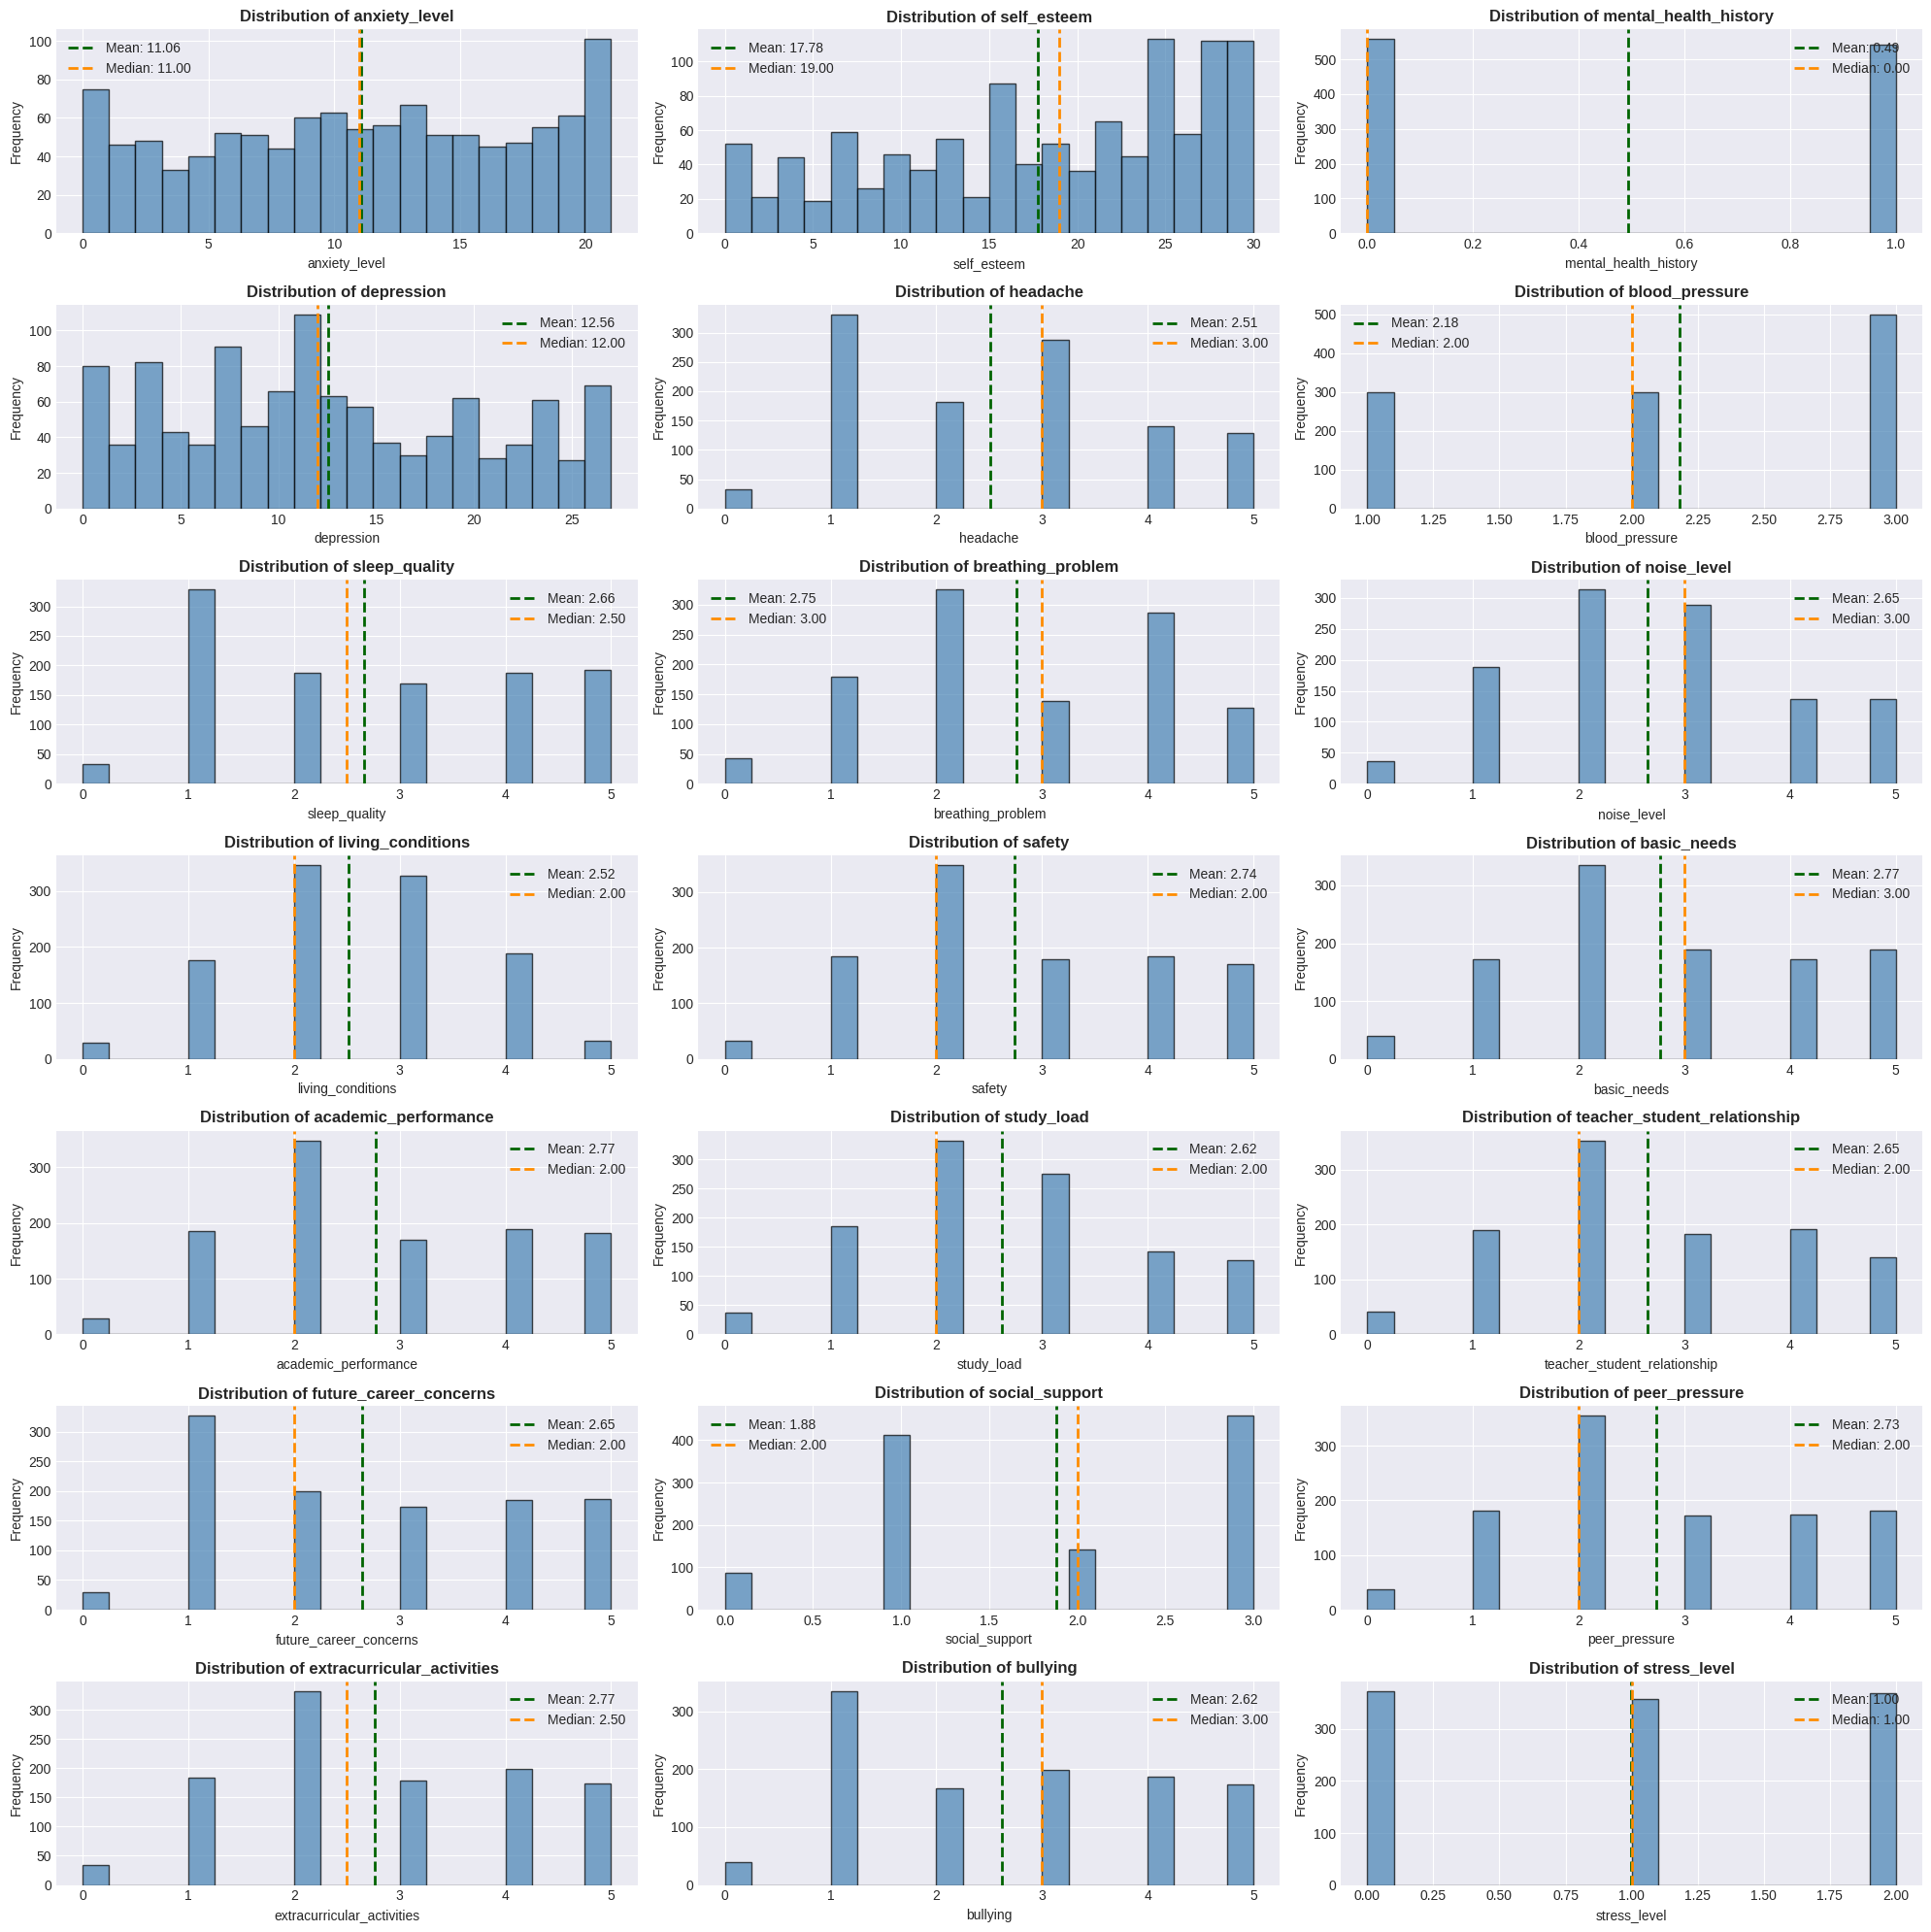

In [ ]:
from os import altsep
##univariate analysis

#subplots for all features
fig, axes =plt.subplots(nrows=7, ncols=3, figsize=(20,20))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
  axes[idx].hist(df[col], bins=20, edgecolor="black",
                 alpha=0.7,
                 color="steelblue")
  axes[idx].set_title(f"Distribution of {col}", fontsize=12,
                      fontweight="bold")
  axes[idx].set_xlabel(col)
  axes[idx].set_ylabel("Frequency")

  #add mean and median lines
  mean_value = df[col].mean()
  median_value = df[col].median()
  axes[idx].axvline(mean_value, color = "darkgreen",
                    linestyle="--", linewidth=2,
                    label=f"Mean: {mean_value:.2f}")
  axes[idx].axvline(median_value, color = "darkorange",
                    linestyle="--", linewidth=2,
                    label=f"Median: {median_value:.2f}")
  axes[idx].legend()

plt.tight_layout()
plt.show()

In [ ]:
#check for skewness
print("skewness of features:")
skewness= df.skew()
print(skewness.sort_values(ascending=False))

skewness of features:
headache                        0.270494
study_load                      0.228964
depression                      0.216638
noise_level                     0.207122
future_career_concerns          0.204276
teacher_student_relationship    0.198016
peer_pressure                   0.194719
safety                          0.188097
academic_performance            0.184316
sleep_quality                   0.177975
bullying                        0.175348
basic_needs                     0.135859
extracurricular_activities      0.135604
mental_health_history           0.029134
living_conditions               0.018794
stress_level                    0.006728
breathing_problem              -0.001625
anxiety_level                  -0.082612
social_support                 -0.180958
blood_pressure                 -0.351186
self_esteem                    -0.396539
dtype: float64


interpretacion
asimetria positiva:

Variables como "headache", "study_load" y "depression" dan a entender que la mayoría de los estudiantes reportan niveles bajos de estos problemas. Sin embargo, hay una minoria que experimenta las variables.

interpretacion asimetria negativa:


Variables como "self_esteem" y "social_support" tienen asimetría negativa. Esto indica que la mayoría de los estudiantes reportan niveles altos de autoestima y apoyo social. Hay una menor cantidad de estudiantes que reportan puntuaciones bajas en estas áreas. Este es un hallazgo positivo, ya que un alto nivel de autoestima y apoyo social actúa como un factor de protección contra el estrés.

Target variable analysis (stress_level)


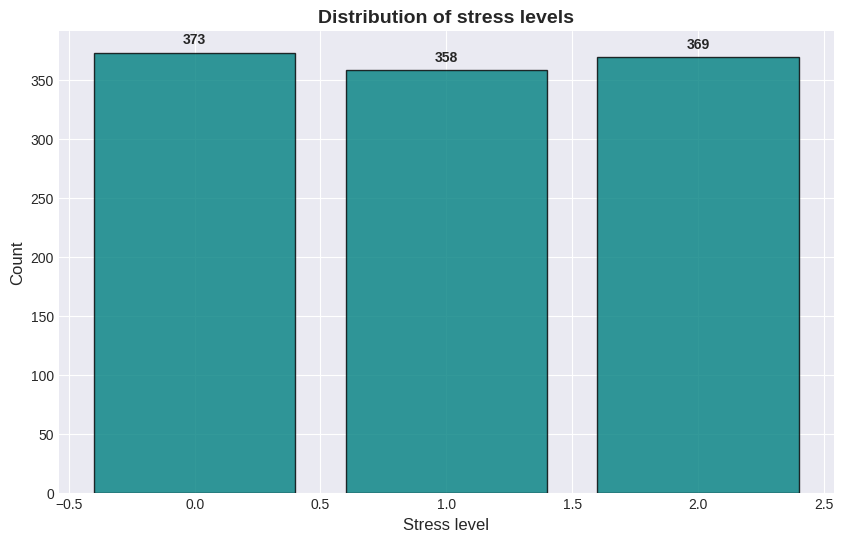

In [ ]:
##iv. target analysis
print("Target variable analysis (stress_level)")

#stress level distribution
plt.figure(figsize=(10, 6))
stress_counts = df["stress_level"].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values,
               edgecolor="black",
               color="teal", alpha=0.8)
plt.xlabel("Stress level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of stress levels", fontsize=14, fontweight="bold")

##add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v + 5, str(v), ha='center',
             va='bottom', fontweight='bold')
plt.show()

In [ ]:
print("\nStress Level Value Counts:")
print(stress_counts)
print(f"\nPercentage Distribution:")
print((stress_counts / len(df) * 100).round(2))



Stress Level Value Counts:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64

Percentage Distribution:
stress_level
0    33.91
1    32.55
2    33.55
Name: count, dtype: float64


Este patrón de distribución uniforme sugiere que el nivel de estrés no está sesgado hacia un extremo (muy bajo o muy alto)

CORRELATION ANALYSIS


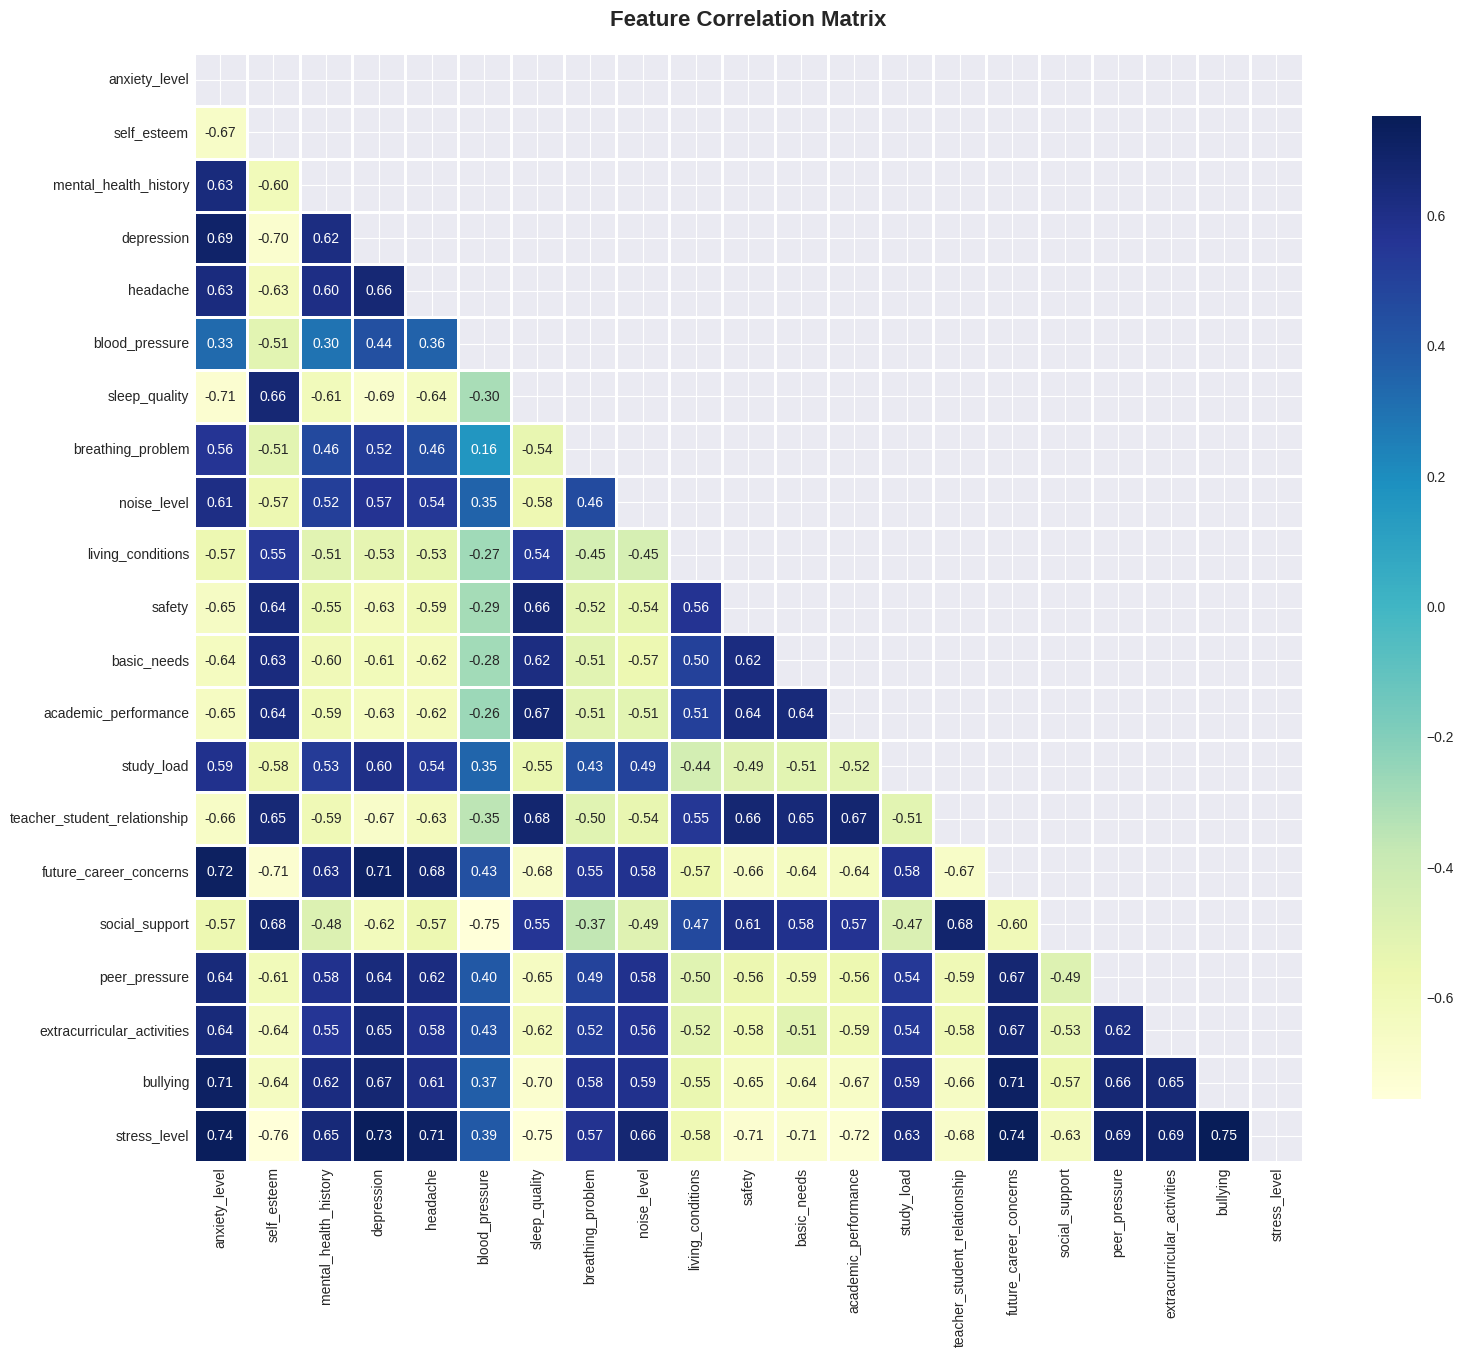

In [ ]:
##v. correlation analysis

print("CORRELATION ANALYSIS")
correlation_matrix = df.corr()

#heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
#blue-green colormap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='YlGnBu', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#top correlations with stress_level

stress_correlations = correlation_matrix['stress_level'].drop('stress_level').sort_values(ascending=False)
print("\nTop 10 Features Correlated with Stress Level:")
print(stress_correlations.head(10))
print("\nBottom 10 Features Correlated with Stress Level:")
print(stress_correlations.tail(10))



Top 10 Features Correlated with Stress Level:
bullying                      0.751162
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
peer_pressure                 0.690684
noise_level                   0.663371
mental_health_history         0.648644
study_load                    0.634156
Name: stress_level, dtype: float64

Bottom 10 Features Correlated with Stress Level:
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


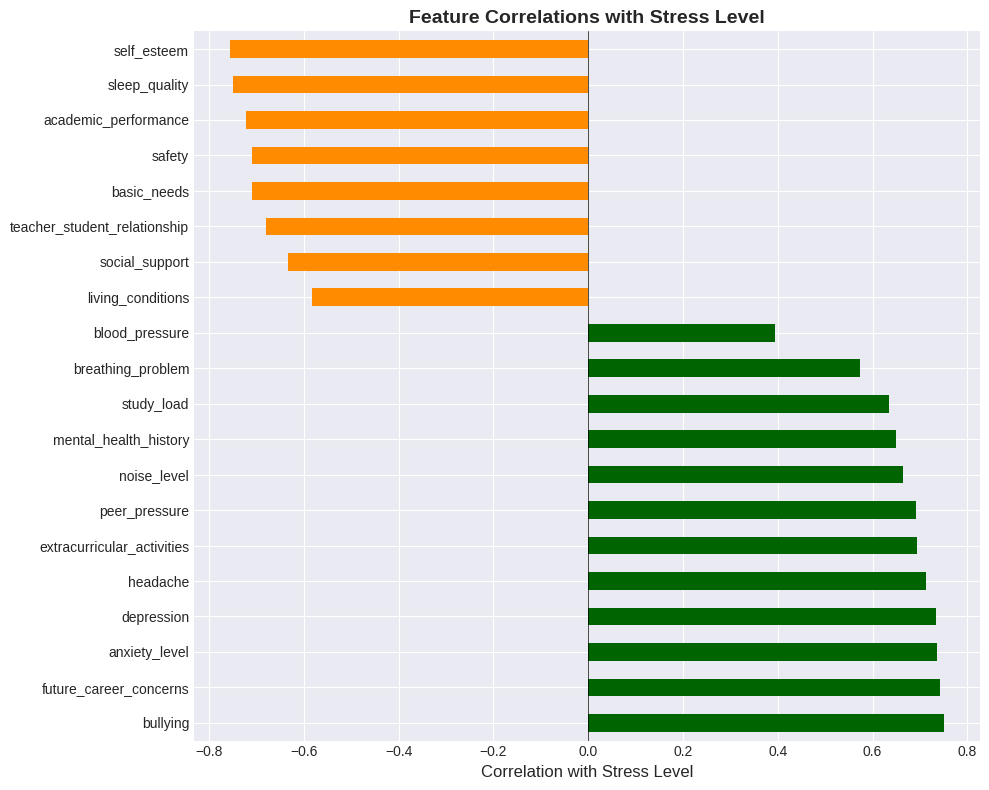

In [ ]:
# Visualize correlations with stress_level
plt.figure(figsize=(10, 8))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
stress_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Stress Level', fontsize=12)
plt.title('Feature Correlations with Stress Level', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

Correlación positiva (barras verdes): Indica que a medida que una variable aumenta, el nivel de estrés también tiende a aumentar.

Correlación negativa (barras naranjas): Indica que a medida que una variable aumenta, el nivel de estrés tiende a disminuir.

In [ ]:
#Multicollinearity detection

print("MULTICOLLINEARITY DETECTION")

#  highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")

MULTICOLLINEARITY DETECTION

Highly Correlated Feature Pairs (|correlation| > 0.7):
                 Feature 1               Feature 2  Correlation
16                bullying            stress_level     0.751162
15  future_career_concerns            stress_level     0.742619
3            anxiety_level            stress_level     0.736795
7               depression            stress_level     0.734379
1            anxiety_level  future_career_concerns     0.717016
8                 headache            stress_level     0.713484
14  future_career_concerns                bullying     0.711278
2            anxiety_level                bullying     0.709982
6               depression  future_career_concerns     0.706561
12             basic_needs            stress_level    -0.708968
11                  safety            stress_level    -0.709602
0            anxiety_level           sleep_quality    -0.710292
4              self_esteem  future_career_concerns    -0.712520
13    academic_perfo

 Los datos muestran que los factores de riesgo no son independientes. Existe una fuerte correlación entre ellos:

Anxiety_level y future_career_concerns: Los estudiantes con altos niveles de ansiedad son los mismos que tienen grandes preocupaciones sobre su futuro profesional.

Future_career_concerns & bullying: La presión por el futuro y el acoso escolar están fuertemente relacionados. Esto podría significar que el acoso puede afectar el rendimiento y la confianza, lo que a su vez alimenta las preocupaciones por el futuro.

Depression y future_career_concerns: La depresión también está muy ligada a las preocupaciones por la carrera, lo que sugiere que la carga emocional y la falta de esperanza pueden manifestarse en el ámbito académico y profesional.


Relación entre los factores protectores y de riesgo:

Self_esteem y future_career_concerns: Una alta autoestima está fuertemente correlacionada con menos preocupaciones sobre el futuro profesional. Esto subraya la autoestima como un factor clave para gestionar la ansiedad y las presiones académicas.

Anxiety_level y sleep_quality: Un nivel de ansiedad alto está fuertemente relacionado con una mala calidad del sueño. Esto confirma el vínculo entre la salud mental y los problemas físicos.

BIVARIATE ANALYSIS


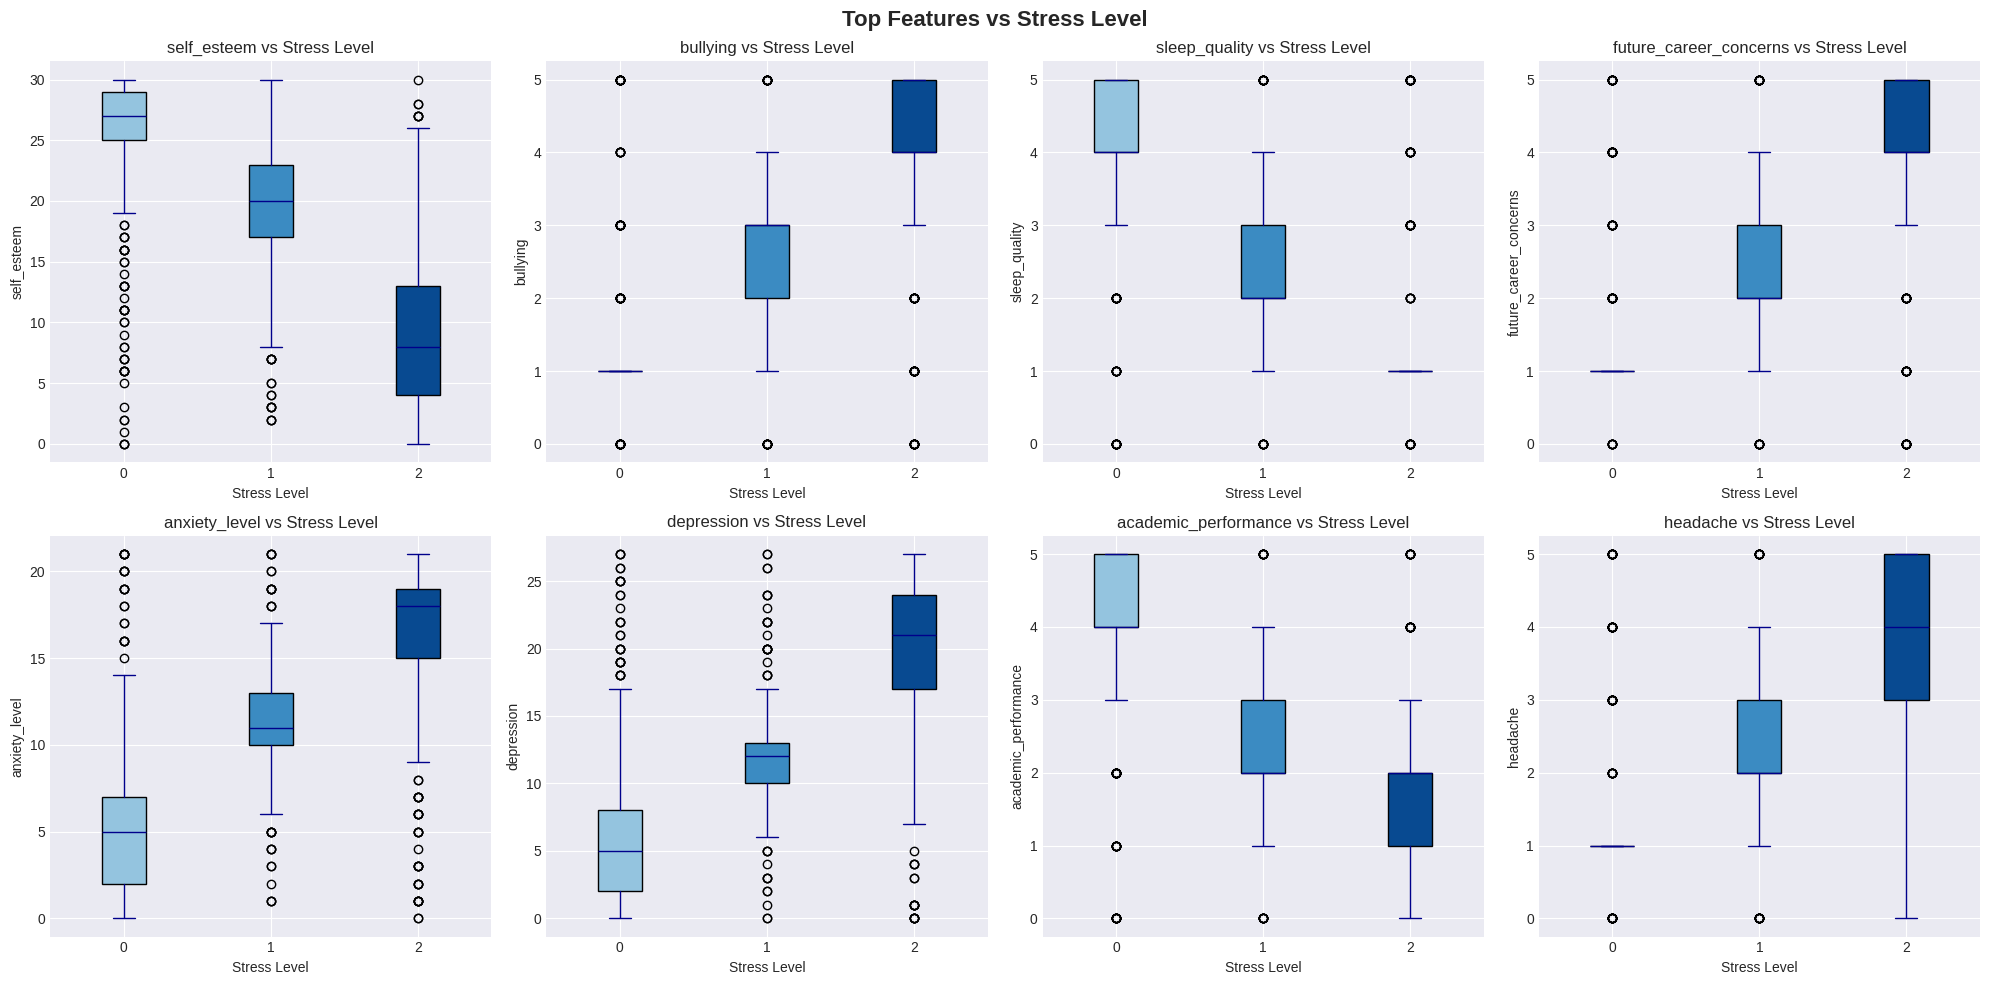

In [ ]:
##vi. Bivariate analysis  feature vs stress level (target)

print("BIVARIATE ANALYSIS")

#select top features based on correlation
top_features = stress_correlations.abs().nlargest(8).index.tolist()

#boxplot for top features vs stress level
fig, axes = plt.subplots(2,4,figsize=(20,10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Group data by stress level for the current feature
    data_to_plot = [df[df['stress_level'] == level][feature].values
                    for level in sorted(df['stress_level'].unique())]

    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')

    axes[idx].set_title(f'{feature} vs Stress Level', fontsize=12)
    axes[idx].set_xlabel('Stress Level')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(sorted(df['stress_level'].unique()))

plt.suptitle('Top Features vs Stress Level', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

La dirección de la caja (subiendo o bajando) a medida que aumenta el nivel de estrés indica la naturaleza de la relación.

Teniendo este analisis bivariado, podemos ver de forma clara las relaciones que ya se habian detectado en el analisis de correlacion

Factores de Protección: La autoestima, la calidad del sueño y el rendimiento académico actúan como amortiguadores del estrés. Los estudiantes que tienen un alto nivel en estas áreas tienden a experimentar menos estrés.

Factores de Riesgo: El acoso escolar, la ansiedad, la depresión, las preocupaciones por el futuro profesional y los dolores de cabeza están directamente asociados con niveles más altos de estrés. A medida que estos problemas aumentan, el estrés también lo hace.